In [2]:
import spacy
import pandas as pd
import numpy as np

In [7]:
import spacy

nlp = spacy.load('en_core_web_lg')
  
print("Enter two space-separated words")
words = input()
  
tokens = nlp(words)
  
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
  
token1, token2 = tokens[0], tokens[1]
  
print("Similarity:", token1.similarity(token2))

Enter two space-separated words


 happy sad


happy True 5.565662 False
sad True 6.1658983 False
Similarity: 0.6438988447189331


In [21]:
df = pd.read_csv("words.csv")
n = 200
df2 = df.sample(n)
df2

,word
1199,grave
302,board
1703,much
2913,weight
586,continue
1653,milk
1091,for
1263,high
2007,potentially
581,container


In [22]:
nlp = spacy.load('en_core_web_lg')

A = np.empty((n, n))

i = 0
j = 0
for word1 in df2["word"]:
    j = 0
    for word2 in df2["word"]:
        wordComp = word1 + " " + word2
        tokens = nlp(wordComp)
        token1, token2 = tokens[0], tokens[1]
        A[i,j] = token1.similarity(token2)
        j += 1
    i += 1
A

array([[1.        , 0.11413176, 0.29364103, 0.10982414, 0.28931758,
        0.11119787, 0.17820226, 0.1790757 , 0.30550227, 0.15914692],
       [0.11413176, 1.        , 0.28009629, 0.21554908, 0.29437566,
        0.18380487, 0.32896036, 0.34786171, 0.21262681, 0.20186193],
       [0.29364103, 0.28009629, 1.        , 0.42506942, 0.49585301,
        0.33117428, 0.48990089, 0.48920745, 0.4850893 , 0.18728656],
       [0.10982414, 0.21554908, 0.42506942, 1.        , 0.20401958,
        0.30534396, 0.27969348, 0.42450005, 0.26438254, 0.24369659],
       [0.28931758, 0.29437566, 0.49585301, 0.20401958, 1.        ,
        0.2461233 , 0.36856687, 0.34074071, 0.49942589, 0.13010141],
       [0.11119787, 0.18380487, 0.33117428, 0.30534396, 0.2461233 ,
        1.        , 0.22081067, 0.28112838, 0.23779683, 0.41413987],
       [0.17820226, 0.32896036, 0.48990089, 0.27969348, 0.36856687,
        0.22081067, 1.        , 0.41902104, 0.33007026, 0.20784123],
       [0.1790757 , 0.34786171, 0.4892074

In [ ]:
for i in range(n):
    for j in range(n):
        A[i,j]

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

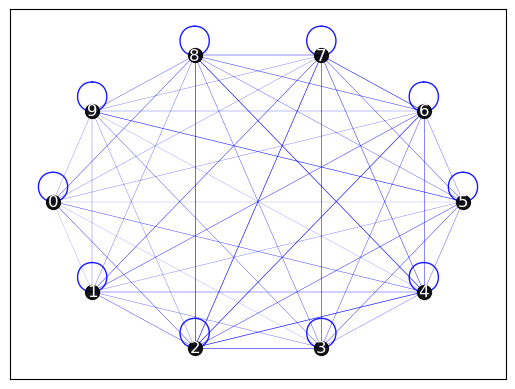

In [23]:
G = nx.from_numpy_matrix(A)
layout = nx.spring_layout(G)
widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=100,
                       node_color='black',
                       alpha=0.9)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.9)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
#nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()